Once you have imported a longitudinal dataset, you can get started working with geosnap `Community`s. A `Community` is a collection of neighborhoods that stores information about their boundaries and demographic composition over several time periods. You instantiate a `Community` by passing a `source` from which the tabular data are collected, and a selection filter that defines the study area. The selection filter can be either a boundary (in the form of a `geopandas.GeoDataFrame` or a set of [FIPS](https://www.policymap.com/2012/08/tips-on-fips-a-quick-guide-to-geographic-place-codes-part-iii/) codes. **Boundary queries are often more convenient but they are considerably more expensive**

## Create a dataset by passing a boundary

In [2]:
sac = gpd.read_file(lps.examples.get_path('sacramentot2.shp'))

In [3]:
sac.crs={'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

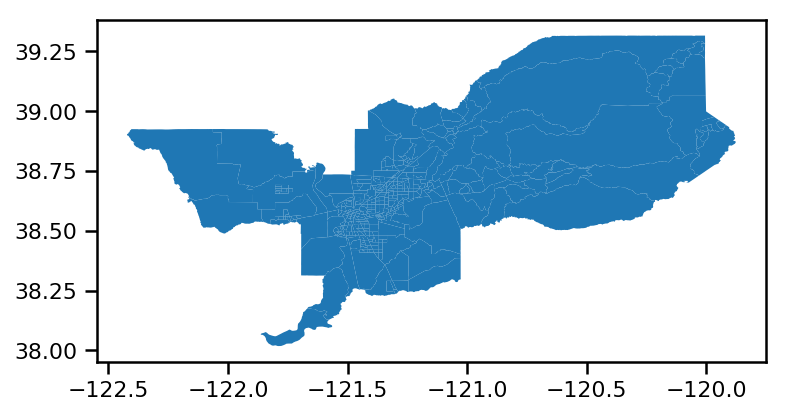

In [4]:
sac.plot()

In [5]:
sacramento = geosnap.data.Community(name='Sacramento Metro', source='ltdb', boundary=sac)

The `Community` class stores state, county, and tract boundaries, available as  
  
`Community.states`  
`Community.counties`  
`Community.tracts`  

The boundaries are `geopandas.GeoDataFrame`s

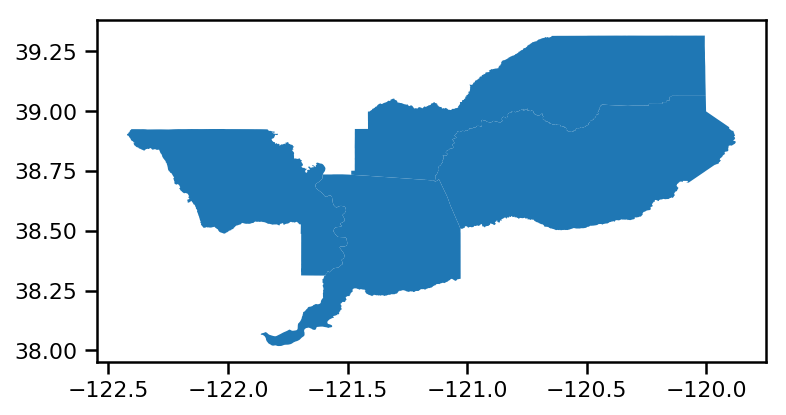

In [6]:
sacramento.counties.plot()

In [7]:
sacramento.tracts.head()

,geoid,geometry
3,06067002300,"POLYGON ((-121.502176 38.556434, -121.501838 3..."
4,06067002400,"POLYGON ((-121.509697 38.540699, -121.509598 3..."
221,06017030902,"POLYGON ((-120.93831 38.66398100000001, -120.9..."
222,06017031302,"POLYGON ((-120.666241 38.738623, -120.666094 3..."
223,06017031404,"POLYGON ((-120.763449 38.70745, -120.763407 38..."


Tabular data from the designated source is stored in a long-form `pandas.DataFrame`, available as  
  
`Community.census`  

In [8]:
sacramento.census.head()

,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,n_native_over_60,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
geoid,,,,,,,,,,,,,,,,,,,,,
06017030200,NaN,0.0,NaN,NaN,1334.0,1530.0,NaN,0.0,NaN,NaN,...,4755.0,1970,2904.0,NaN,8.0,0.0,NaN,NaN,NaN,6.0
06017030301,NaN,0.0,NaN,NaN,251.0,297.0,NaN,0.0,NaN,NaN,...,991.0,1970,822.0,NaN,10.0,0.0,NaN,NaN,NaN,3.0
06017030302,NaN,0.0,NaN,NaN,294.0,347.0,NaN,0.0,NaN,NaN,...,1160.0,1970,962.0,NaN,10.0,0.0,NaN,NaN,NaN,3.0
06017030401,NaN,1.0,NaN,NaN,389.0,438.0,NaN,0.0,NaN,NaN,...,1292.0,1970,818.0,NaN,9.0,0.0,NaN,NaN,NaN,5.0
06017030402,NaN,2.0,NaN,NaN,741.0,829.0,NaN,0.0,NaN,NaN,...,2383.0,1970,1410.0,NaN,8.0,0.0,NaN,NaN,NaN,5.0


For convenience, a plotting method is implemented that accepts a column name and a year and an optional title. If a title is not passed, geosnap will try to generate one from the `Community` name and the column being plotted (you can opt for no title by passing `title=''`). County boundaries can be turned off py passing ` plot_counties=False`. For more control, you can also setup a plot manually and pass a matplotlib `ax`.

In [9]:
sacramento.plot(column='median_household_income', year=1990)

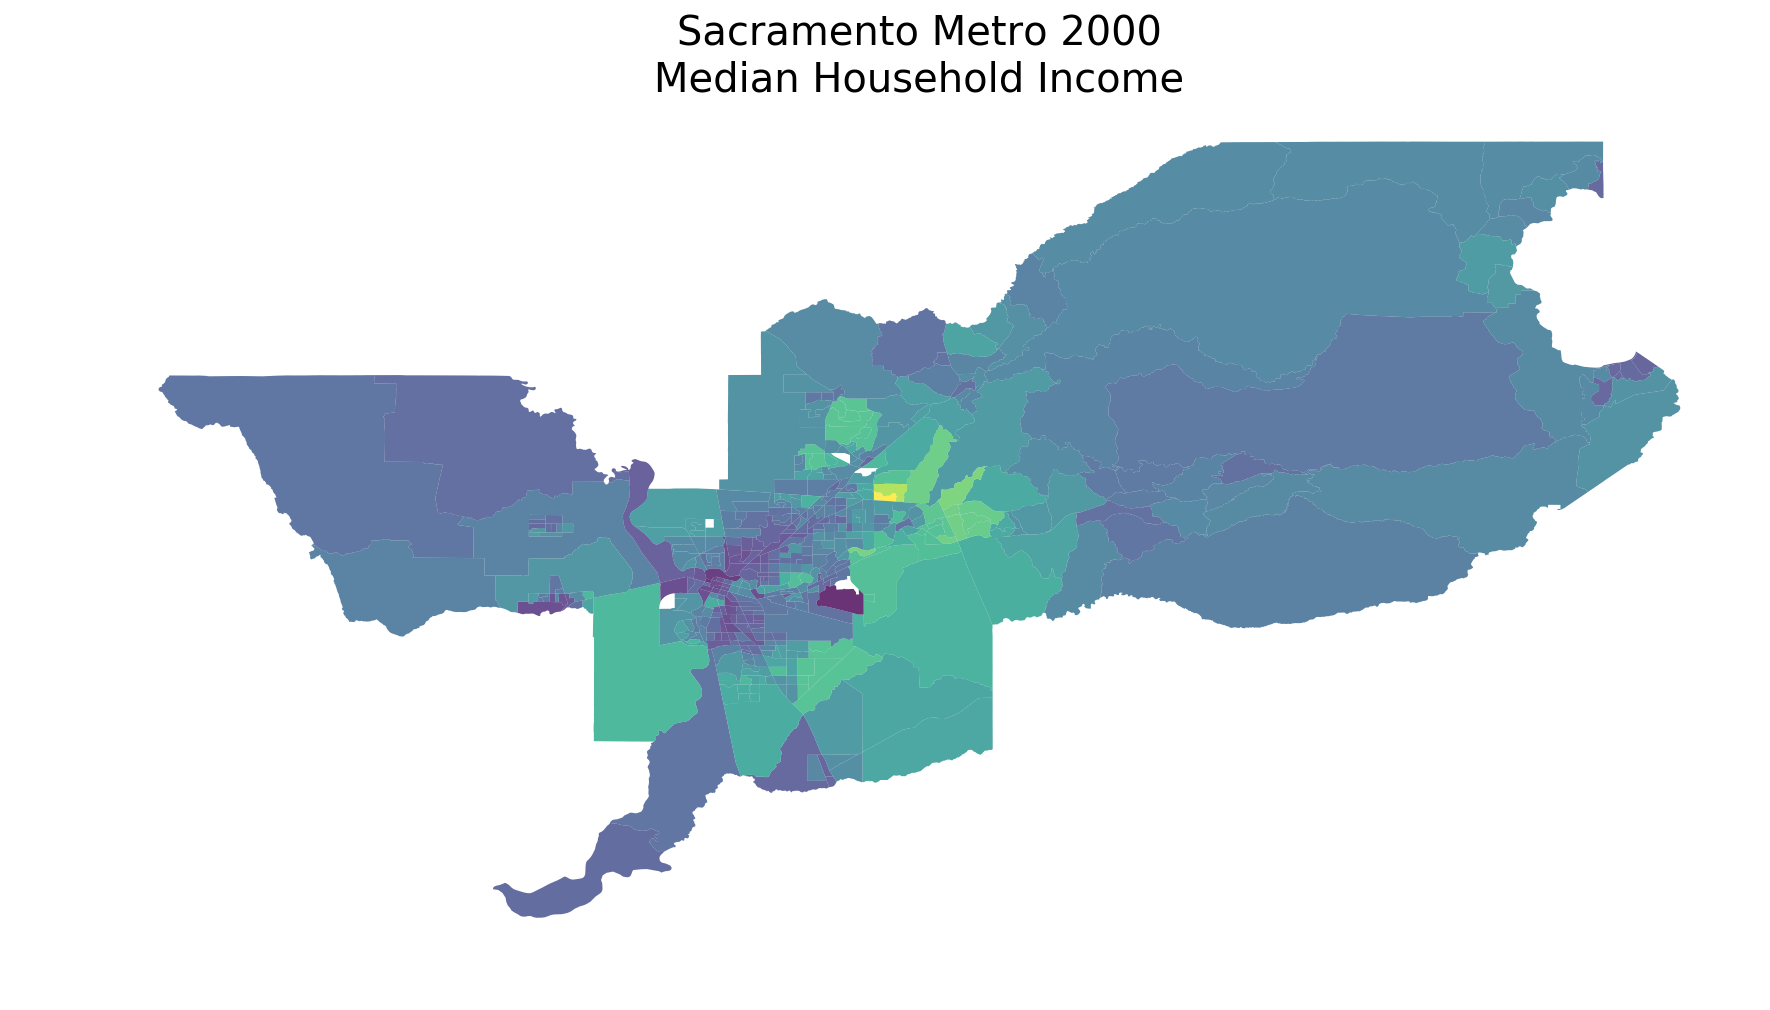

In [10]:
sacramento.plot(column='median_household_income', year=2000, plot_counties=False)

A `Community` can be arbitrarily large or small. A convenient way to create `Community` datasets is with the [`osmnx`](https://github.com/gboeing/osmnx) library which can quickly grab city and other administrative boundaries from OpenStreetMap

In [11]:
rside_bound = ox.gdf_from_place('Riverside, California')
riverside = geosnap.data.Community(source='ltdb', name='riverside', boundary=rside_bound)

Additional `kwargs` are passed through to geopandas plotting method so you can alter the color scheme or add a legend as well

In [12]:
riverside.plot(column='p_employed_professional', year=2010, plot_counties=False, title='Share of Employees in Professional Occupations\n in Riverside CA',
             cmap='YlOrBr', scheme='quantiles', k=6, legend=True)

/Users/knaaptime/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


## Create a dataset by passing a list of state/county FIPS

Instead of passing a boundary (which is significantly more time and memory intensive), users can pass a list of FIPS codes. Counties are optional, so statewide or regionwide datasets can be created by passing only states

In [13]:
california = geosnap.data.Community(name='California', source='ltdb', statefips='06') 

Since each `Community` has a few geometries (tracts, counties, states)--and since all of these maps are ugly and unprojected--`Community`s have a  
  
`Community.to_crs`  
  
method that will project all of the associated geoms all at once.

In [14]:
# use osmnx to find the correct crs automagically, reproject the Community, and plot it

california.to_crs(ox.project_gdf(california.tracts).crs).plot(column='p_nonhisp_white_persons', year=2010, plot_counties=False, legend=True, cmap='Blues', scheme='quantiles', k=7)

In [15]:
balt_counties = ['003', '005', '510', '013', '025', '027', '035']
baltimore = geosnap.data.Community(name='Baltimore Metro Region', source='ltdb', statefips='24', countyfips=balt_counties)
baltimore = baltimore.to_crs(epsg=2248)

In [16]:
baltimore.plot(column='p_unemployment_rate', year=2010, scheme='quantiles', k=10, legend=True)

When analyzing neighborhood dynamics, it is common to define a study region as a metropolitan area. For this reason, `geosnap` also makes available a GeoDataFrame of metropolitan and micropolitan areas that can be used for quickly querying metropolitan-scale data extracts. The GeoDataFrame is available as  
  
`geosnap.data.metros`

In [17]:
# query metros dataframe to find the geoid/fips code of the Washington DC metro

geosnap.data.metros[geosnap.data.metros.name.str.startswith('Wash')]

,geoid,name,type,geometry
189,47780,"Washington, IN",Micro Area,"POLYGON ((-87.14186099999999 38.847958, -87.14..."
190,47820,"Washington, NC",Micro Area,"POLYGON ((-77.084643 35.552601, -77.0846409999..."
191,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Metro Area,"POLYGON ((-78.28480499999999 38.759315, -78.29..."
192,47920,"Washington Court House, OH",Micro Area,"POLYGON ((-83.663522 39.617725, -83.662594 39...."


In [18]:
# use the the cbsa fips code (geoid) for the dc metro to instantiate a Community

dc_metro = geosnap.data.Community(name="DC Metro Region", source='ltdb', cbsafips='47900')

/Users/knaaptime/projects/geosnap/geosnap/data/data.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['geometry'] = df.wkb.apply(lambda x: wkb.loads(x, hex=True))
/Users/knaaptime/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/knaaptime/projects/geosnap/geosnap/data/data.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [19]:
dc_metro = dc_metro.to_crs(epsg='2248')

In [20]:
dc_metro.plot(column='p_edu_college_greater', year=1980, title="% With a Bachelor's Degree or Greater\nDC Metro Region 1980", 
              scheme='quantiles', k=6, cmap='YlOrBr', legend=True)

You can use `add_indices` when instantiating a `Community` to add arbitrary fips codes (except CBSAs) to any filter 

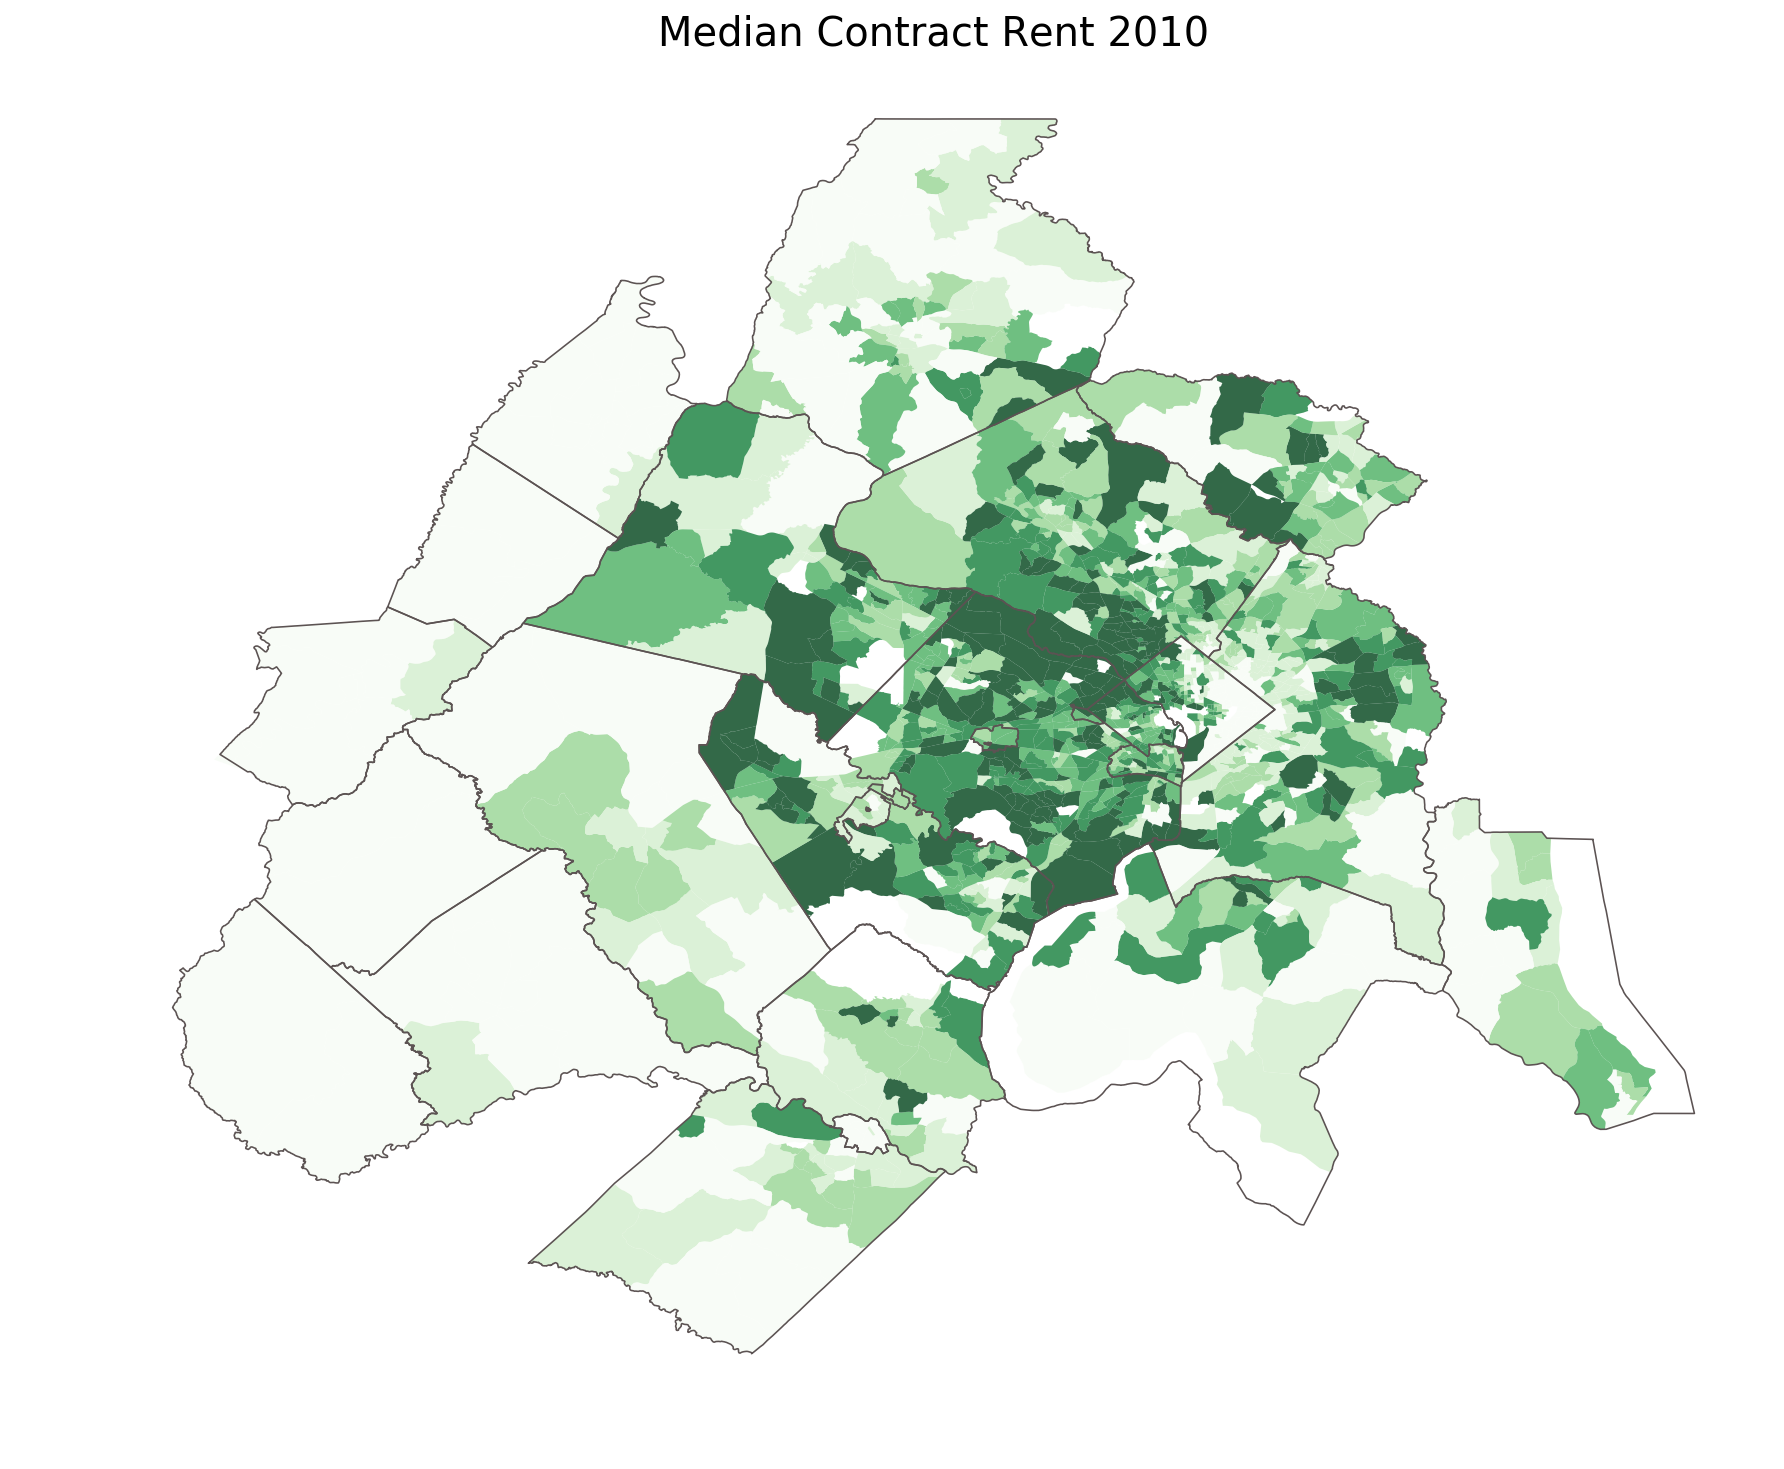

In [21]:
dc_metro_plus_howard = geosnap.data.Community(source='ltdb', cbsafips='47900', add_indices=['24027'])
dc_metro_plus_howard.plot(column='median_contract_rent', cmap='Greens', scheme='quantiles', k=6)